# Logos from alignment

Logomaker provides functionality to convert multiple sequence alignments to valid dataframes that can subsequently
be drawn as logos. We begin by importing useful python packages. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import sys
sys.path.append('../../')
import logomaker as lm

Consider the following multiple sequence alignment (in fasta format) representing CRP binding sites
on the E-Coli genome (from [1](#crpsitesfa)).

In [2]:
with lm.open_example_datafile('crp_sites.fa', print_description=False) as f:
    raw_seqs = f.readlines()
raw_seqs[10:20]    

['>0\tcaiFp\t-41.5\n',
 'ATAAGCAGGATTTAGCTCACACTTAT\n',
 '>1\tcaiTp\t-41.5\n',
 'AAAAATGTGATACCAATCACAGAATA\n',
 '>2\tfixAp\t-126.5\n',
 'ATATTGGTGATCCATAAAACAATATT\n',
 '>3\tfixAp\t-69.5\n',
 'ATATTGGTGAGGAACTTAACAATATT\n',
 '>4\taraBp\t-93.5\n',
 'GATTATTTGCACGGCGTCACACTTTG\n']

Where we have used the Logomaker method [open_example_datafile](https://logomaker.readthedocs.io/en/latest/examples_src.html#open-example-datafile) to read the sequences from a fasta file. We can clean up these raw sequences by running:

In [3]:
seqs = [seq.strip() for seq in raw_seqs if ('#' not in seq) and ('>') not in seq]
# preview sequences
print('There are %d sequences, all of length %d'%(len(seqs), len(seqs[0])))
seqs[:5]

There are 358 sequences, all of length 26


['ATAAGCAGGATTTAGCTCACACTTAT',
 'AAAAATGTGATACCAATCACAGAATA',
 'ATATTGGTGATCCATAAAACAATATT',
 'ATATTGGTGAGGAACTTAACAATATT',
 'GATTATTTGCACGGCGTCACACTTTG']

Once in this form, we can use Logomaker's [Alignment_to_Matrix](https://logomaker.readthedocs.io/en/latest/matrix.html#alignment-to-matrix) method to generate a counts dataframe, which can be input to Logomaker

In [4]:
counts_mat = lm.alignment_to_matrix(seqs)
counts_mat.head()

,A,C,G,T
pos,,,,
0,133.0,65.0,72.0,88.0
1,147.0,46.0,58.0,107.0
2,166.0,26.0,38.0,128.0
3,164.0,28.0,43.0,123.0
4,133.0,45.0,47.0,133.0


Entering the counts matrix into The Logo class draws a counts logo:

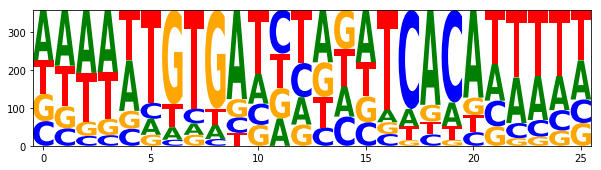

In [5]:
lm.Logo(counts_mat)

## Multiple Sequence Alignment With Gaps

Logomaker maker is able to load alignments with gaps in them. We load the WW domain protein alignment ([2](#WWdomain))

In [6]:
# load ww alignment
with lm.open_example_datafile('ww_sequences.fa', print_description=False) as f:
    lines = f.readlines()
    
# preview loaded file
print(''.join(lines[:20]))

# 
# WW domain alignment in FASTA format.
# From PFAM, RP15 (4025)
# http://pfam.xfam.org/family/PF00397#tabview=tab3
# 
# References
# 
# Finn RD et al. (2014) Pfam: the protein families database.
# Nucl Acids Res. 42(Database issue):D222–30.
# 
>B7G9D5/250-280
LPPQW..TEA.VDVDT...GKFYFVHVET.......KETRWERP
>B7G9D5/328-356
--PGW..TAT.VDPAS...GRTYYYHAAT.......GETRWEPP
>B7G9D5/387-417
LPSGW..VEQ.TDPSS...GRPYYYHNAS.......NLTQWERP
>B7G9D5/503-533
LPAGW..VAA.NDPSS...GRTYYYHAES.......GVTSWNPP
>B7G9D5/626-656
LPNGW..QEL.VDPSS...GSTYYYNEVN.......GTTSWDRP



As before, we clean up the sequences as follows:

In [7]:
# extract ww domain sequences
seqs = [seq.strip().upper() for seq in lines if ('#' not in seq) and ('>') not in seq]

# preview sequences
# Preview sequences
print('There are %d sequences, all of length %d'%(len(seqs), len(seqs[0])))
seqs[:10]

There are 4025 sequences, all of length 44


['LPPQW..TEA.VDVDT...GKFYFVHVET.......KETRWERP',
 '--PGW..TAT.VDPAS...GRTYYYHAAT.......GETRWEPP',
 'LPSGW..VEQ.TDPSS...GRPYYYHNAS.......NLTQWERP',
 'LPAGW..VAA.NDPSS...GRTYYYHAES.......GVTSWNPP',
 'LPNGW..QEL.VDPSS...GSTYYYNEVN.......GTTSWDRP',
 'LPEGW..VEL.VHESS...GKTYYFHAED.......NVTSWEQP',
 'LPQGW..IEA.VDPST...EATYYINEVE.......GITSWERP',
 'LPPGW..AKL.THPDS...GDAYYYNEAT.......NATSWDIP',
 '--TGW..EAL.VDEAS...GAIYYYNKLD.......GTSSWERP',
 'LPEGW..IEV.MDPNS...GSVYYFNEVD.......GTSSWDKP']

We load the alignment as a count matrix, again by using [Alignment_to_Matrix](https://logomaker.readthedocs.io/en/latest/matrix.html#alignment-to-matrix). Note the use of the keyword argument `characters_to_ignore`: Logomaker can be told to ignore certain characters in sequences. 

In [8]:
# create counts matrix
ww_counts_df = lm.alignment_to_matrix(sequences=seqs, to_type='counts', characters_to_ignore='.-X')

# preview counts dataframe
ww_counts_df.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0
1,24.0,0.0,0.0,14.0,4.0,8.0,9.0,0.0,4.0,8.0,0.0,8.0,2651.0,15.0,2.0,9.0,2.0,1.0,0.0,0.0
2,319.0,56.0,280.0,425.0,21.0,62.0,57.0,7.0,76.0,60.0,9.0,64.0,999.0,94.0,40.0,365.0,106.0,35.0,3.0,70.0
3,112.0,0.0,201.0,149.0,6.0,2320.0,49.0,3.0,31.0,22.0,4.0,243.0,320.0,45.0,10.0,50.0,3.0,15.0,0.0,2.0
4,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3880.0,48.0


The full counts logo looks like:

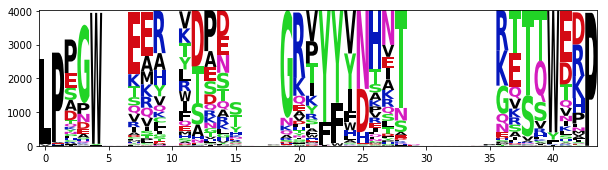

In [9]:
# show full ww counts
lm.Logo(ww_counts_df)

We can create a cropped logo by running the snippet below:

In [10]:
# filter base on counts
num_seqs = ww_counts_df.sum(axis=1)
pos_to_keep = num_seqs > len(seqs)/2
ww_counts_df = ww_counts_df[pos_to_keep]
ww_counts_df.reset_index(drop=True, inplace=True)

The cropped logo now looks like:

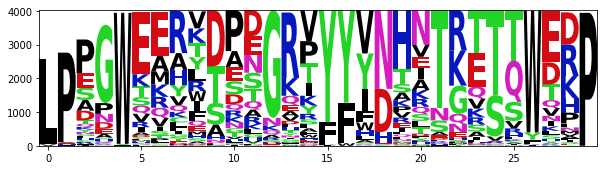

In [11]:
# show cropped ww counts logo
lm.Logo(ww_counts_df)

# References

<a id='crpsitesfa'></a>
[1] Salgado H, et al. (2013) `RegulonDB v8.0: omics data sets, evolutionary conservation, regulatory phrases, cross-validated gold standards and more.` Nucl Acids Res. 41 (Database issue):D203-13.

<a id='WWdomain'></a>
[2] Finn RD et al. (2014) Pfam: the protein families database. Nucl Acids Res. 42(Database issue):D222–30.